# Importing of Libraries
## Importing of the core libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Deleting of the warnings which we are not be interested in

## Importing of the metrics&encoding&split&preprocessing libraries

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

## Importing of the machine learning algorithms

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
import xgboost as xgb

# First Look To Data

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train = df_train.copy()
df_test = df_test.copy()

# Let's concatenate test and train datasets, because we'll do a lot feature engineering and we need to get same feature sizes of train and test datasets
df_train_len = len(df_train)
df = pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

## For Train Data

In [5]:
print("*"*30, "HEAD", "*"*30)
display(df.head(5))
print("*"*30, "SHAPE", "*"*30)
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")
print("*"*30, "INFO", "*"*30)
display(df.info())
print("*"*30, "DESCRIBE", "*"*30)
display(df.describe().T)
print("*"*30, "NULL?", "*"*30)
display(df.isnull().sum())
print("*"*30, "DUPLICATED", "*"*30)
display(df.duplicated().sum())
print("*"*30, "EXPLAINING", "*"*30)

****************************** HEAD ******************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


****************************** SHAPE ******************************
Rows: 1309
Columns: 12
****************************** INFO ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

****************************** DESCRIBE ******************************


,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


****************************** NULL? ******************************


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

****************************** DUPLICATED ******************************


0

****************************** EXPLAINING ******************************


**With the first look of the train data, we know:**
- There are 1309 rows and 12 columns
- There are "5 int64", "5 object", "2 float" columns
- **5 columns have missing values** , **Age: 263, Cabin: 1014, Embarked: 2, Fare: 1 and Survived(But,Survived missing values correspond to the concatenate test-train datasets (Survived column doesn't exist in test set and has been replace by NaN values when concatenating the train and test set)**
    - We need to handle with missing values, because **some machine learning algorithms don't know the modelling with the missing values** and missing values can cause the errors.
- There are no duplicated values
    - This is good, because **duplicated values cause the "bias"**. If there was a duplicated values, we need to handle with them also.

# Let's analyze all features by one by

## Survived

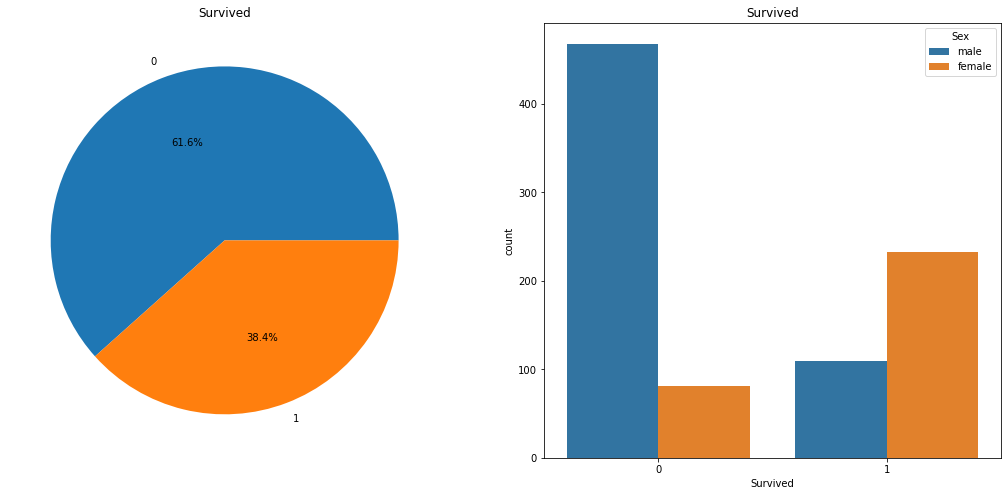

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1], hue = "Sex")
ax[1].set_title('Survived')
plt.show()

We can observe from the figures, there are %61,6 died and %38,4 survived people in train dataset

## Sex

In [7]:
pd.crosstab(df.Sex, df.Survived, margins=True)

Survived,0.0,1.0,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [8]:
female_survived_percentage = (233/314)*100
print(f"Percentage of survived females: {female_survived_percentage}")
male_survived_percentage = (109/577)*100
print(f"Percentage of survived males: {male_survived_percentage}")

Percentage of survived females: 74.20382165605095
Percentage of survived males: 18.890814558058924


From the crosstab, we can say the females had chance to live much more than the males. According to the percantage values, we can easily see that.
But, will we see the importance of the "Sex" feature in machine learning algorithms? Let's see at the end.

## PCLASS

,Survived
Pclass,
1,136
2,87
3,119


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

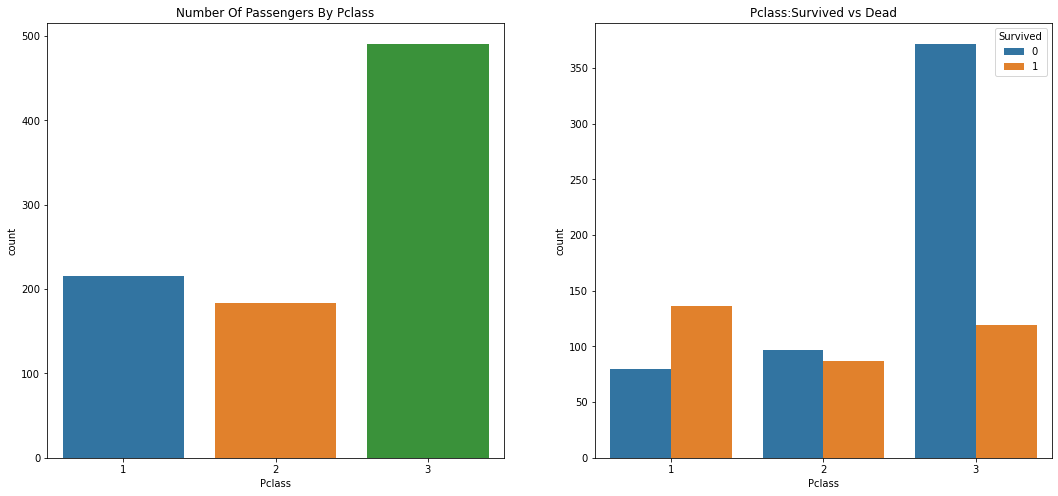

In [9]:
display(df_train.groupby("Pclass")[["Survived"]].sum())
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x='Pclass',data=df_train)
plt.title('Number Of Passengers By Pclass')

plt.subplot(1,2,2)
sns.countplot(x='Pclass',hue='Survived',data=df_train)
plt.title('Pclass:Survived vs Dead')

From these numbers and the plot, we can see the most survived number is in the first class, then third and last one is second class.

In addition we can see from the first plot, there are the most people in ship from the third class.

Let's examine this feature deep into

<AxesSubplot:xlabel='Sex,Survived'>

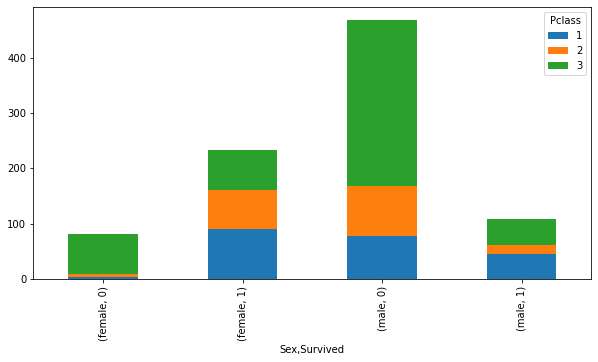

In [10]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass).plot.bar(stacked=True, figsize=(10,5))

When we look at the stacked bar plot:

  - **The most died people in "Pclass 3" for females and in "Pclass 1" there are only 3 women died.**
  - **Also, the most died people in "Pclass 3" for males.**
    
In titanic, people with "Pclass 3" were much more than others. So, we expect to the most died people in there. But, we need to look at the percentage of each Pclass to explain correctly.

In [11]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
percentage_list1 = []
percentage_list2 = []
percentage_dict = {"Percentages": {"Survived females": percentage_list1, "Survived males": percentage_list2 } }

for i in range(1,4):
    df_female_all = df_train.query(f'Pclass == {i} & Sex == "female"')
    f_all = df_female_all["Survived"].count()
    df_female_survived = df_train.query(f'Pclass == {i} & Survived == 0 & Sex == "female"')
    f_survived = df_female_survived["Survived"].count()
    percentage_f = 100-((f_survived/f_all)*100)
    percentage_list1.append([f"Pclass{i}",percentage_f])
for i in range(1,4):
    df_male_all = df_train.query(f'Pclass == {i} & Sex == "male"')
    m_all = df_male_all["Survived"].count()
    df_male_survived = df_train.query(f'Pclass == {i} & Survived == 0 & Sex == "male"')
    m_survived = df_male_survived["Survived"].count()
    percentage_m = 100-((m_survived/m_all)*100)
    percentage_list2.append([f"Pclass{i}",percentage_m])
              
table = pd.DataFrame(percentage_dict)               
display(table)    

,Percentages
Survived females,"[[Pclass1, 96.80851063829788], [Pclass2, 92.10526315789474], [Pclass3, 50.0]]"
Survived males,"[[Pclass1, 36.885245901639344], [Pclass2, 15.740740740740748], [Pclass3, 13.544668587896254]]"


We can see the number of died and survived counts from the crosstab, but we need to fast looking of the percentages, because of that I made a simply code to see survived percentages.

**According to the percentages which can be seen from above table, "Survived" percentages P1>P2>P3 for both females and males.**

***It can be seen that, upper socio economic status had high order in survived.***

Let's look at the correlation between the Pclass and Survived features.

In [12]:
df_pclass = df_train[["Pclass", "Survived"]]
display(df_pclass.corr())

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


#### **Explaining of the correlation:**
- Correlation helps us to compare two variable.
- Correleation takes values in range of -1 and 1
- If we get -1, we have strong correlation in opposite direction. Well, while one variable is increasing, the other one is decreasing.
- If we get 1, we have strong correlation in the same direction. Well, while one variable is increasing, the other one is increasing also.
- Lastly, If we get 0, we have no correlation between two variables.
    


According to the correlation coefficient(-0.33) between the Pclass and Survived features. We can say there is a "weak correlation".

**Observation**: After the all analysis, Pclass feature looks important but not too much.

## AGE 

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


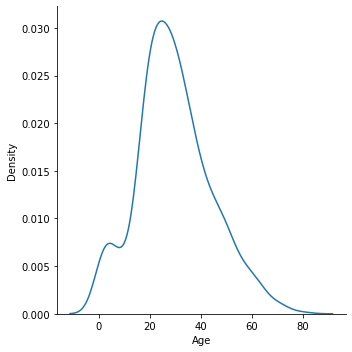

In [13]:
display(df_train[["Age"]].describe().T)
sns.displot(data=df_train, x="Age",kind="kde")

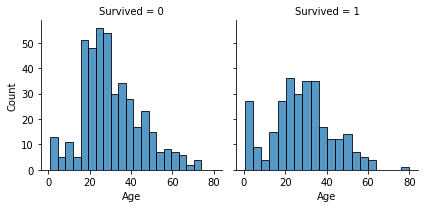

In [14]:
g = sns.FacetGrid(df_train, col = "Survived")
g.map(sns.histplot, "Age", bins = 20)
plt.show()

- Age <= 10 has a high survival rate,
- Oldest passenger(80) in the ship survived,
- Large number of around 20 years old did not survive,
- Most passengers are in 15-35 age range,

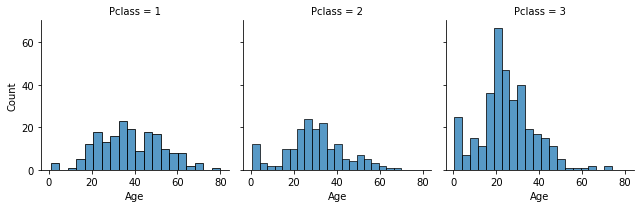

In [15]:
g = sns.FacetGrid(df_train, col = "Pclass")
g.map(sns.histplot, "Age", bins = 20)
plt.show()

It can be easily seen, 
- The majority of the elderly(>50) population on ship is in "Pclass1"
- The majority of the younger(<35) population is in "Pclass3".

**Observation**: Age feature looks like a important feature, and we should remember there was a missing values. I'll handle with the missing values in feature engineering part.

## Embarked

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton



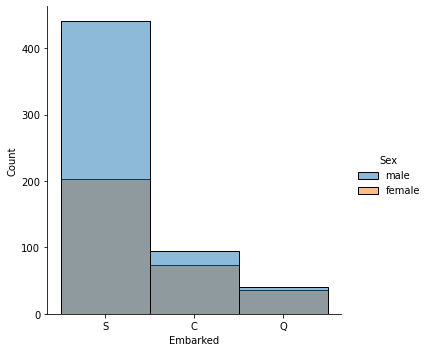

In [16]:
sns.displot(data=df_train, x="Embarked", hue="Sex")

- Most people get in ship from Southampton and lowest people from Queenstown
- From the Queenstown, most people are female.

<Figure size 864x576 with 0 Axes>

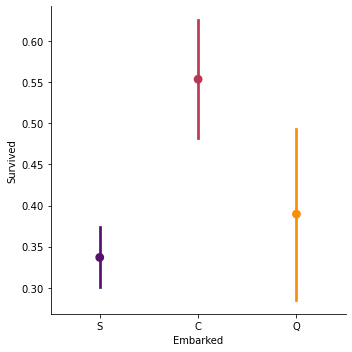

In [17]:
plt.figure(figsize=(12,8))
sns.factorplot('Embarked','Survived',data=df_train, palette = "inferno")

Survival rate order according to the port of embarkation is, Cherbourg>Queenstown>Southampton

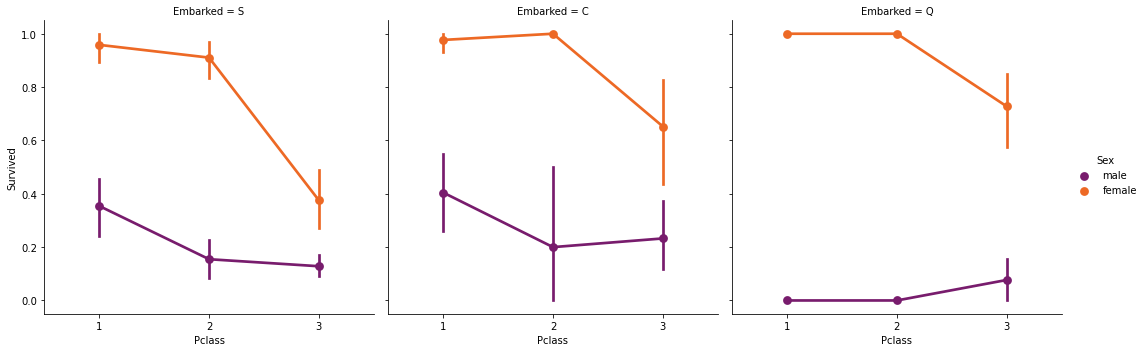

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train, palette = "inferno")


- As we examined before, Pclass 3 survival rate is very low.
- For port Q, males survival rate is unfortuanetely very low for each Pclass
- For port S, Pclass 3 survival rate is low

## Fare

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


,Fare
Sex,
female,44.479818
male,25.523893


<AxesSubplot:xlabel='Fare', ylabel='Count'>

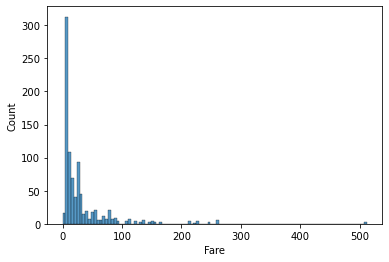

In [19]:
display(df_train[["Fare"]].describe().T)

display(df_train.groupby("Pclass")[["Fare"]].mean())

display(df_train.groupby("Sex")[["Fare"]].mean())

sns.histplot(data=df_train, x="Fare")

Let's explain the values that we get from the describe and groupby function:

- Mean value of Fare is 32.20, min value is 0 and max value is 512.32
- We have a high standard deviation value that is 49.69
- Mean fare value of passengers according to the Pclass;
    - Pclass1: 84.15
    - Pclass2: 20.66
    - Pclass3: 13.67
        - So, we can clearly see that, socio enomic status effect on fares.
- If we get into the mean fare value of according to the "Sex", females fares is higher than the males.
- Lastly, we can get from the plot, majority of people paid lowest fares. We already knew this from the Pclass feature also, because the most people were from Pclass3.

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


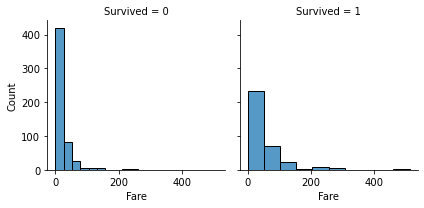

In [82]:
g = sns.FacetGrid(df_train, col = "Survived")
g.map(sns.histplot, "Fare", bins = 10)

df_fares = df_train[["Fare", "Survived"]]
display(df_fares.corr())

#### **Money is effect to the survival rate?**

- We can observe it from the graphs, died people are majority in lowest fares.

 **Observation:** Money is unfortuanetely effect the survival rate. But we must notice that, there is a "weak correlation", because correlation coefficient is 0.25


## SibSp

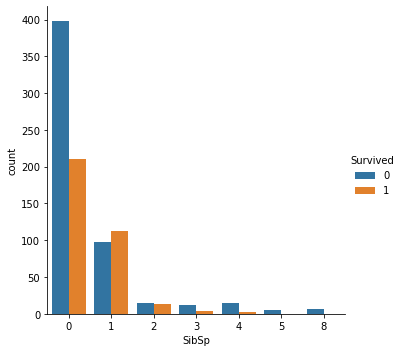

In [21]:
display(pd.crosstab([df_train.SibSp],[df_train.Survived, df_train.Pclass], margins=True).style.background_gradient(cmap='inferno'))
sns.catplot(data=df_train, x="SibSp", hue="Survived", kind="count" )

#### Let's examine the SibSp feature according to the crosstab and countplot ➡

- Majority of the people have "0" value of SibSp, well 608 people are alone and 209 people just have "1" siblings or spouse. In total 817 people are alone or have 1 SibSp.
- People have above the 3 siblings are in Pclass3 and almost of these people are death. It can be caused the number of the families, imagine you are in the titanic with your family, you were trying to save them and find them. Maybe, while they were searching or trying to save their family, they died.
- While siblings value is increasing, survival rate is decreasing.m

In [22]:
df_sibsp = df_train[["SibSp", "Survived"]]
display(df_sibsp.corr())

,SibSp,Survived
SibSp,1.000000,-0.035322
Survived,-0.035322,1.000000


There is no correlation between the SibSp and Survived features. Because, density of "0-1 SibSp" is high.

## Parch

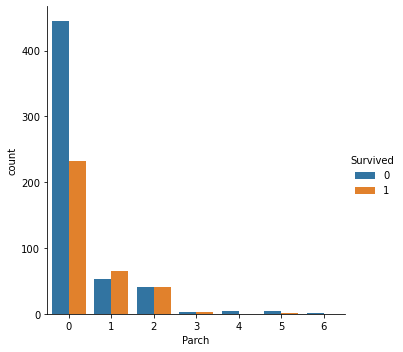

In [23]:
display(pd.crosstab([df_train.Parch],[df_train.Survived, df_train.Pclass], margins=True).style.background_gradient(cmap='inferno'))
sns.catplot(data=df_train, x="Parch", hue="Survived", kind="count" )

- Density of the "Parch" feature is high in 0-1-2 numbers, We noticed in "SibSp" part the most people were alone, also we can observe this situation from the "Parch".
- While parch number is increasing(>3), we can observe, almost everyone is from Pclass3 and survival rate is so low.

# Feature Engineering

### **Steps:**

- **Handling with missing values**
- **Handling with outliers**
- **Feature Transformation**
- **Encoding**
- **Feature Selection**
- **Preparing of Train and Test Values**
- **Feature Scaling**

### HANDLING WITH MISSING VALUES

<AxesSubplot:>

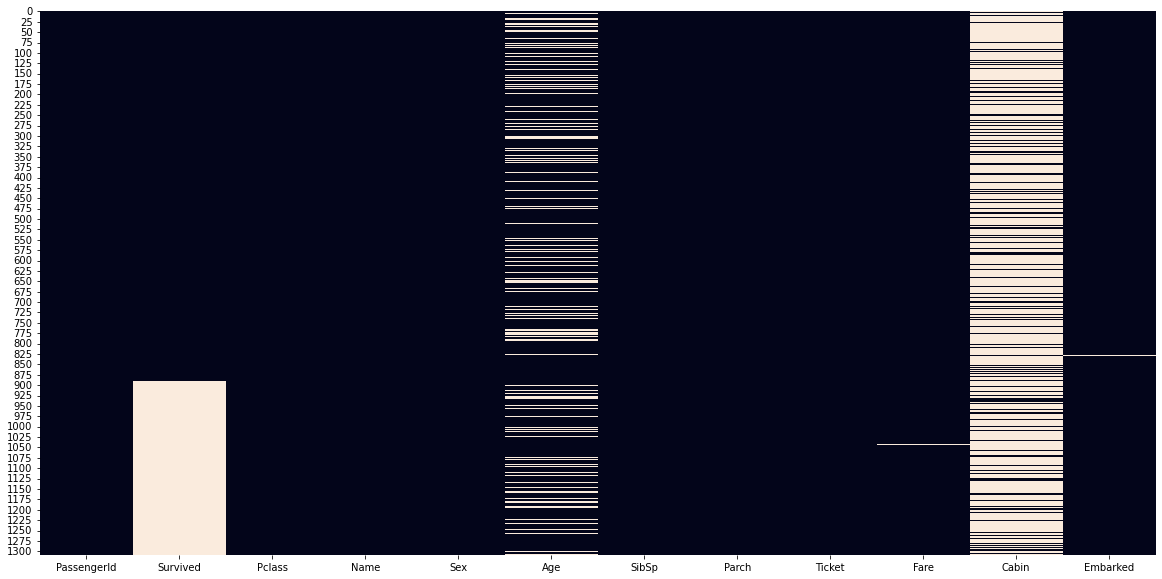

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

It can be clearly seen from the matrix, like we said age and cabin features have missing values and cabin's values looks like have much more missing values.Also, survived have missing values but because of the test dataset. We will split the dataset in model section, so we will not have the missing value problem of Survived feature.

In [25]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

There are mainly two methods of handling with missing values.
- **Deleting missing value**s(This is useful when column has a %65+ percent of missing values or we couldn't get any information from the colums causing by the missing values)
- **Impute missing values with "mean,median,zero" for quantative variables**(Like, Age)
- **Impute missing values with "mode, "other"" for qualitative variables**(Like, Embarked)
Let's get rid off the missing values with "Imputation Method"

**Let's begin ➡**

In [26]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df["Fare"]= df["Fare"].fillna(df["Fare"].mean())
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [27]:
missing_percentage_cabin= (df["Cabin"].isnull().sum()/df.shape[0])*100
print(f"Percentage of the missing values in Cabin attiribute: {missing_percentage_cabin}")

Percentage of the missing values in Cabin attiribute: 77.46371275783041


Cabin have a %77 percent of missing values, So I will delete this attribute, because it's redundant.

In [28]:
df.drop(columns="Cabin", inplace=True)

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Handling with Outliers

<AxesSubplot:xlabel='Fare'>

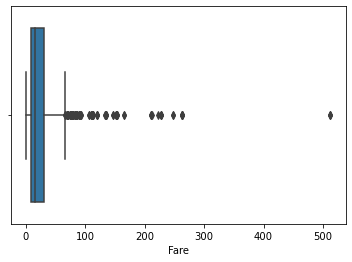

In [30]:
sns.boxplot(data=df_train, x="Fare")

We can see the outliers in "Fare", but, titanic have a lot of choices for passengers fares and mostly people from the ship are in Pclass3 and mean value of fare is creating density in around 0-100 because of that, we are detecting outliers on boxplot. Shortly, these outliers can be and we can't describe them as an outliers.

Also, we can explain the same situation for the "Age" feature, so, I will not examine it in outliers

## Feature Transformation

In this subset, I'll create new features with existing features.

In the EDA section, I said I will concatanete the "SibSp" and "Parch" to new feature "Family". Because, in totaly these two feature have the family numbers.

In [31]:
df["Family"]= df["SibSp"]+df["Parch"]
display(df.head())
display(df.groupby("Family")[["Sex"]].count())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


,Sex
Family,
0,790
1,235
2,159
3,43
4,22
5,25
6,16
7,8
10,11


## Encoding

- **Any machine learning algorithm**, whether it is a linear-regression or a KNN-utilizing Euclidean distance, requires numerical input features to learn from.
- Categorical inputs cause the some errors and mostly machine learning algorithms don't know to work with the object inputs.

There are several methods we can rely on to transform our categorical data into numerical data.

We will use two of them:
- Label Encoding
- One-Hot Encoding

This methods simply the convert object inputs to numerical input and in binary system.

- We will use **label encoding for "Sex"** feature and it'll convert the female-male to 0-1.
- For **Embarked feature we will use one-hot encoding** and we'll get 2 new columns with binary system.

Note: While we implement encoding methods, We should care the **dummy variable trap**. But, what is the dummy variable trap?

**The dummy variable trap** is when you have independent variables that are multicollinear, or highly correlated. Simply put, these variables can be predicted from each other. If we create two columns by "Sex" feature, female(0-1) and male(0-1) these two columns can be predicted from each other. So, we'll create just one column for "Sex" feature.

In [32]:
lbe=LabelEncoder()
df["Sex"] = lbe.fit_transform(df['Sex'])
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0


In [33]:
df = pd.get_dummies(data=df, prefix=["Embarked"], columns=["Embarked"], drop_first=True)
# It is created dummy variables of "Embarked" features with one-hot encoding method. 
#For avoid the dummy variable trap, I used "drop_first", with this first column that I have created is deleted.

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


## Feature Selection

### Redundant Features

**Name**➡ We don't need name feature as it cannot be converted into any categorical value. It include some titles(Mr,Mrs,Ms) of people but, we already have family feature.

**Ticket**➡ It is any random string that cannot be categorised.

**Cabin**➡ We already drop this feature because of the missing values

**PassengerId**➡ Cannot be categorised.

In [35]:
df.drop(columns=["Name","Ticket","PassengerId"], inplace = True)

### Selection with Correlation

<AxesSubplot:>

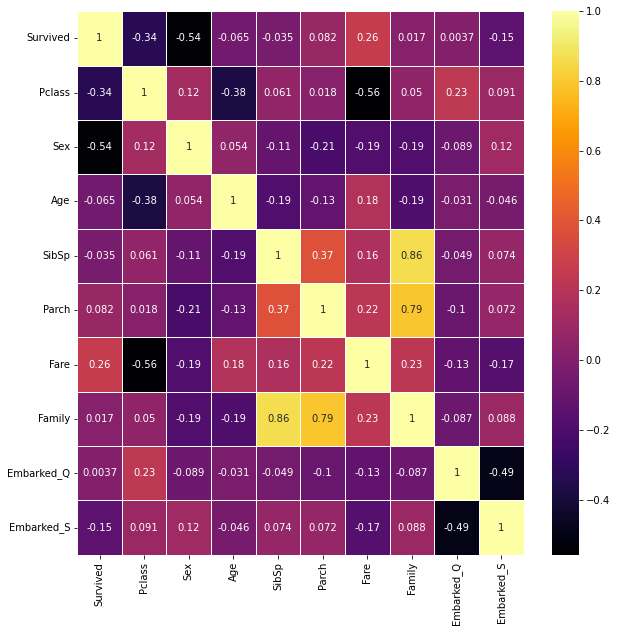

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=.9)

**The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.We analyze some correlations in the previous parts, for example, we said correlation between the Survived-Fare is 0.25. It's the same value in heatmap, it is 0.26 just rounded value of that we calculated. Wıth the heatmap we can analyze and get observations of whole data according to the correlations.**
#### Observations from the heatmap:
 - **The maximum correleation numbers** in heatmap from the Family with Parch-SibSp because we create new feature as family using Parch and SibSp. Because of that, **there is multicollinearity, so I'll delete Parch and SibSp.**
 - Pclass and Fare has a good negative relation. Because when Pclass is increasing, passengers fares is decreasing. 

In [38]:
df.drop(columns=["Parch","SibSp"], inplace = True)

In [39]:
df.corr()[["Survived"]]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,-0.543351
Age,-0.064910
Fare,0.257307
Family,0.016639
Embarked_Q,0.003650
Embarked_S,-0.149683


 - **Let's look at the "Survived" feature's correlation numbers**, when we look at the dependent variable's correlation numbers we want to strong relations because we care prediction. But, If we look at the correlations of "Survived", except the Pclass and Sex features almost all features have no correlation. Already we deleted a lot features, because of that I can't do anything with correlation numbers.

We did feature transformation and selection parts, so we can split the df into the train and test datasets again.



In [40]:
df_train = df[:df_train_len]
df_test = df[df_train_len:]
df_test.drop(labels=["Survived"],axis = 1,inplace=True)

In [41]:
df_train["Survived"]=df_train["Survived"].astype("int64")

In [42]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,1,0,1
4,0,3,1,35.0,8.0500,0,0,1


In [43]:
df_test.head()

,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S
891,3,1,34.5,7.8292,0,1,0
892,3,0,47.0,7.0000,1,0,1
893,2,1,62.0,9.6875,0,1,0
894,3,1,27.0,8.6625,0,0,1
895,3,0,22.0,12.2875,2,0,1


## Preparing of Train and Test Values

In [44]:
y_train = df_train["Survived"]
X_train = df_train.drop(labels = ["Survived"],axis = 1)
X_test = df_test

## Feature Scaling

Some machine learning models rely on learning methods that are affected greatly by the scale of the data, meaning that if we have a column such as "x" that lives between 24 and 122, and an "y" column between 21 and 81, then our learning algorithms will not learn optimally.

Normalization techniques are meant to level the playing field of data by ensuring that **all rows and columns are treated equally under the eyes of machine learning**.

There are mainly three types of scaling:

- Z-score standardization

- Min-max scaling

- Normalization

I'll use normalization method ➡

**Note:** No matter the scaling method, feature scaling always divides the feature by a constant (known as the normalization constant). Therefore, it does not change the shape of the single-feature distribution.

In [67]:
preprocessing.normalize(X_train)

array([[0.12808793, 0.04269598, 0.93931146, ..., 0.04269598, 0.        ,
        0.04269598],
       [0.0123775 , 0.        , 0.47034498, ..., 0.0123775 , 0.        ,
        0.        ],
       [0.10963184, 0.        , 0.95014262, ..., 0.        , 0.        ,
        0.03654395],
       ...,
       [0.08156203, 0.        , 0.76124558, ..., 0.08156203, 0.        ,
        0.02718734],
       [0.02517367, 0.02517367, 0.65451537, ..., 0.        , 0.        ,
        0.        ],
       [0.0906571 , 0.03021903, 0.96700902, ..., 0.        , 0.03021903,
        0.        ]])

In [68]:
X_train = pd.DataFrame(X_train)

# Model

## Base Model with Cross Validation

In [69]:
kfold = StratifiedKFold(n_splits=10)
random_state = 6

logistic_model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=random_state).fit(X_train,y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
decision_model = DecisionTreeClassifier(random_state=random_state).fit(X_train,y_train)
mlp_model = MLPClassifier(random_state=random_state).fit(X_train, y_train)
gaussian_model = GaussianNB().fit(X_train, y_train)
linear_svm_model = SVC(kernel='linear').fit(X_train,y_train)
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate=0.1).fit(X_train,y_train)
randomforest_model = RandomForestClassifier(random_state=random_state).fit(X_train,y_train)
extra_model = ExtraTreesClassifier(random_state=random_state).fit(X_train,y_train)
gb_model = GradientBoostingClassifier(random_state=random_state).fit(X_train,y_train)
xgb_model = xgb.XGBClassifier().fit(X_train,y_train)

model_names = ["Logistic","Knn","DecisionTree","MLP","GaussianNB","SupportVectorMachine","AdaBoost","RandomForest","ExtraTrees","GradientBoost","Xgboost"]
model_list = [logistic_model,decision_model,mlp_model,knn_model,gaussian_model,linear_svm_model,adaboost_model,randomforest_model,extra_model,gb_model,xgb_model]
results = []
for i in model_list:
    result = cross_val_score(i, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
    results.append(result.mean())

acc_of_models = {"Model": model_names, "Mean Accuracy": results}    
acc_of_models = pd.DataFrame(acc_of_models)
acc_of_models

[11:06:36] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/rayan/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex

,Model,Mean Accuracy
0,Logistic,0.690350
1,Knn,0.759875
2,DecisionTree,0.684769
3,MLP,0.744145
4,GaussianNB,0.715081
5,SupportVectorMachine,0.674632
6,AdaBoost,0.759863
7,RandomForest,0.793533
8,ExtraTrees,0.786804
9,GradientBoost,0.809226


Text(0.5, 1.0, 'Feature Importance in RandomForests')

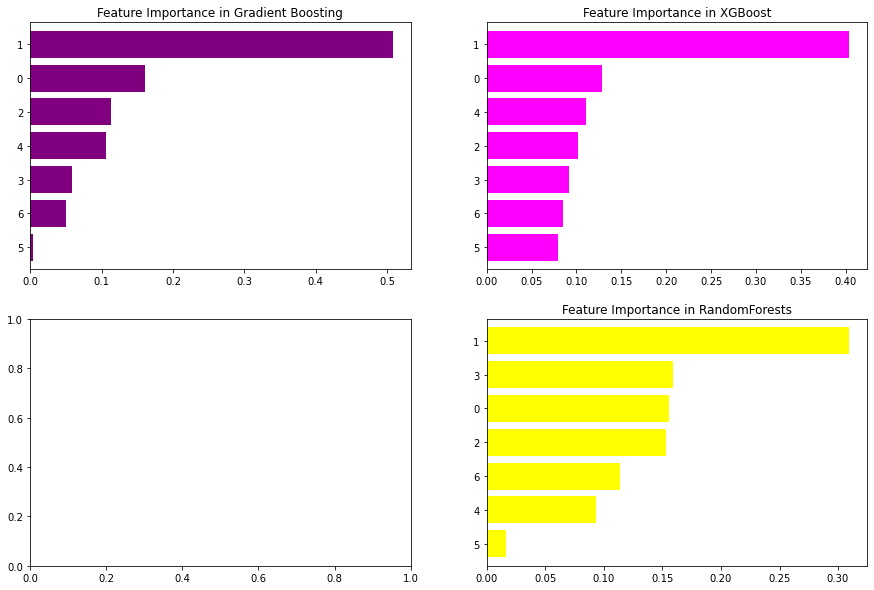

In [71]:
f,ax =plt.subplots(2,2, figsize = (15,10))

pd.Series(gb_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#800080',ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Gradient Boosting')
pd.Series(xgb_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FF00FF',ax=ax[0,1])
ax[0,1].set_title('Feature Importance in XGBoost')
pd.Series(randomforest_model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FFFF00',ax=ax[1,1])
ax[1,1].set_title('Feature Importance in RandomForests')

<AxesSubplot:xlabel='Mean Accuracy', ylabel='Model'>

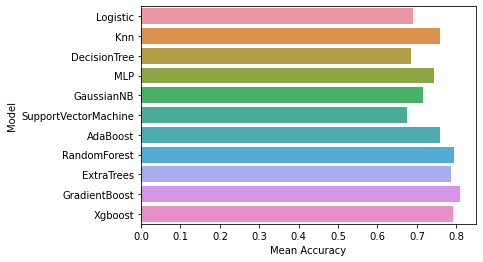

In [72]:
sns.barplot(data=acc_of_models, x="Mean Accuracy", y="Model")

We fit 10 types of classification and ensemble models with Kfold(n=10) cross validation.

So, we get the **best mean accuracy** from the **"GradientBoosting" with %83 and it's the good value for the base model**

#### Let's into the "HyperParemeter Tuning" with "GradientBoostingClassifier".

## Hyper Parameter Tunning with GridSearchCV

In [74]:
#GBC = GradientBoostingClassifier()
#gbc_params = {
              #'n_estimators' : [100,200,500,1000],
              #'learning_rate': [0.1,0.01,0.001],
              #'max_depth': [2,3,7],
              #'min_samples_split':[2,10,50,100],
              #'min_samples_leaf': [1,5,7],
              #'max_features': [0.3, 0.1] 
              #}
#gradient_tuned = GridSearchCV(GBC,gbc_params, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1).fit(X_train,y_train)
#print(f"Best parameters for the Gradient Boosting Model: {gradient_tuned.best_params_}")

- Best parameters for the Gradient Boosting Model: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 0.3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}
- We get best params, because of that I close the code of the hyper parameter tuning with "#". It takes so much time.

In [75]:
GBC = GradientBoostingClassifier(random_state=6)
gbc_params = {'learning_rate': [0.1], 'max_depth': [7], 'max_features': [0.3], 'min_samples_leaf': [7], 'min_samples_split': [2], 'n_estimators': [100]}
gradient_tuned = GridSearchCV(GBC,gbc_params , cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1).fit(X_train,y_train)
print(f"Gradient Boosting Best Accuracy Score: {gradient_tuned.best_score_}")
y_pred = gradient_tuned.predict(X_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Gradient Boosting Best Accuracy Score: 0.7991260923845193


In [76]:
submission_3 = pd.read_csv("gender_submission.csv")

In [77]:
submission_3[["PassengerId"]].head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [78]:
y_pred = pd.DataFrame(y_pred, columns = ["Survived"])
y_pred.head()

,Survived
0,0
1,0
2,0
3,1
4,0


In [79]:
submission_last = pd.concat([submission_3[["PassengerId"]],y_pred],axis=1)

In [80]:
submission_last.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [81]:
submission_last.to_csv('submission_3.csv',index=False)